# Data Modeling with Scikit-Learn

**Outline:**

* [Intro to Scikit-Learn](#Intro-to-Scikit-Learn)
* [Loading Iris Data](#Loading-Iris-Data)
* [Creating a Model](#Creating-a-Model)
* [Training and Testing a Model](#Training-and-Testing-a-Model)
  * [Performing Cross-Validation](#Performing-Cross-Validation)
* [Evaluating a Model](#Evaluating-a-Model)
* [Scikit-Learn Algorithm Cheat Sheet](#Scikit-Learn-Algorithm-Cheat-Sheet)

![](supervised-classification.png)
<div style="text-align: center;">
<strong>Credit:</strong> http://www.nltk.org/book/ch06.html
</div>

## Intro to Scikit-Learn

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://scikit-learn.org/ width=800 height=350></iframe>")

## Loading Iris Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = df.drop(['species'], axis=1)
y = df['species']

## Creating a Model

**Note:** 4-step modeling pattern

### K-nearest neighbors (KNN) classification

**Step 1:** Import the model (import)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** Instantiate an estimator (instantiate)

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)

**Step 3:** Fit the model (fit)

In [8]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Step 4:** Make a prediction (predict)

In [9]:
X_new = [[3, 5, 4, 2]]
knn.predict(X_new)

array(['virginica'], dtype=object)

In [10]:
X_new = [
    [3, 5, 4, 2], 
    [5, 4, 3, 2]
]
knn.predict(X_new)

array(['virginica', 'versicolor'], dtype=object)

### Try a different value for K

In [11]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=10)

# fit
knn.fit(X, y)

# predict
knn.predict(X_new)

array(['versicolor', 'versicolor'], dtype=object)

### Use a different classification model

In [12]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X, y)

# predict
logreg.predict(X_new)

array(['setosa', 'setosa'], dtype=object)

In [13]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X, y)

clf.predict(X_new)

array(['versicolor', 'versicolor'], dtype=object)

## Training and Testing a Model

### Procedure 1: Train and test on the (same) entire dataset

In [14]:
from sklearn import metrics

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
X = df.drop(['species'], axis=1)
y = df['species']

### Logistic Regression

In [16]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X, y)

# predict
y_pred = logreg.predict(X)

metrics.accuracy_score(y, y_pred)

0.9733333333333334

### KNN (K = 5)

In [17]:
# import
from sklearn.neighbors import KNeighborsClassifier

# instantiate
knn = KNeighborsClassifier(n_neighbors=5)

# fit
knn.fit(X, y)

# predict
y_pred = knn.predict(X)

metrics.accuracy_score(y, y_pred)

0.9666666666666667

### KNN (K = 1)

In [18]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=1)

# fit
knn.fit(X, y)

# predict
y_pred = knn.predict(X)

metrics.accuracy_score(y, y_pred)

1.0

### Procedure 2: Train and test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [20]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [21]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


### Logistic Regression

In [22]:
# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

/Users/zkan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9666666666666667

### KNN (K = 5)

In [23]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=5)

# fit
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

### KNN (K = 1)

In [24]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=1)

# fit
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

### Find a better value for K

In [25]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [26]:
scores

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

Text(0, 0.5, 'Testing Accuracy')

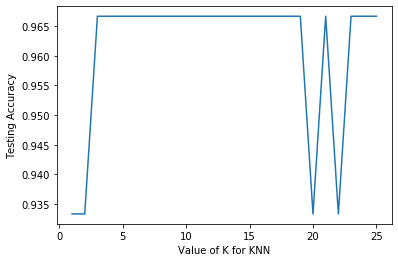

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Select the best value for K

In [28]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=11)

# fit
knn.fit(X, y)

# predict
X_new = [[3, 5, 4, 2]]
knn.predict(X_new)

array(['versicolor'], dtype=object)

### Performing Cross-Validation

* Parameter tuning
* Model selection
* Feature selection

In [29]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False)

print('{} {:^65} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf.split(range(0, 25)), start=1):
    print('{:^10} {} {:^30}'.format(iteration, str(data[0]), str(data[1])))

Iteration                     Training set observations                     Testing set observations
    1      [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [0 1 2 3 4]          
    2      [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [5 6 7 8 9]          
    3      [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]        [10 11 12 13 14]       
    4      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]        [15 16 17 18 19]       
    5      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]        [20 21 22 23 24]       


In [30]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.93333333 1.         0.93333333 0.93333333 1.        ]


In [31]:
print(scores.mean())

0.96


Let's try varying the value for K.

In [32]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

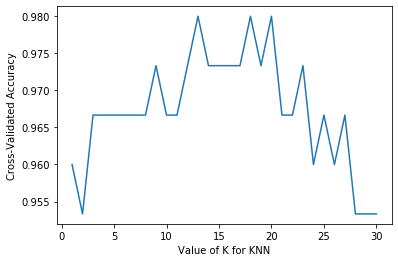

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Evaluating a Model

UCI Machine Learning Repository: [Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/Spambase)

In [34]:
import pandas as pd

In [35]:
spam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

In [36]:
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [37]:
X = spam.drop(57, axis=1)
y = spam[57]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_test)

/Users/zkan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.9131190269331017


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [41]:
pd.Series(y_test).value_counts()

0    691
1    460
Name: 57, dtype: int64

In [42]:
pd.Series(y_test).value_counts().head(1) / len(y_test)

0    0.600348
Name: 57, dtype: float64

### Confusion Matrix

In [43]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[644  47]
 [ 53 407]]


In [44]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.9131190269331017


In [45]:
print(metrics.recall_score(y_test, y_pred_class))

0.8847826086956522


In [46]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [47]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.8964757709251101
0.8964757709251101


### Classification Report

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.92      0.93      0.93       691
        spam       0.90      0.88      0.89       460

    accuracy                           0.91      1151
   macro avg       0.91      0.91      0.91      1151
weighted avg       0.91      0.91      0.91      1151



## Scikit-Learn Algorithm Cheat Sheet

![](scikit-learn-algorithm-cheat-sheet.png)
<div style="text-align: center;">
<strong>Credit:</strong> http://peekaboo-vision.blogspot.de/2013/01/machine-learning-cheat-sheet-for-scikit.html
</div>